In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

In [2]:
x0 = cvx.Variable()
y0 = cvx.Variable()
cst = [
    0 <= x0,
    x0 <= 1,
    y0 >= x0,

    
    
    x0 >= .1,
]

obj = cvx.Minimize(y0)

prob = cvx.Problem(obj, cst)
prob.solve()

0.09999999999951531

In [3]:
def foo(a):
    x0 = cvx.Variable()
    y0 = cvx.Variable()
    x1 = cvx.Variable()
    y1 = cvx.Variable()

    cst = [
        0 <= x0,
        x0 <= 1,
        y0 >= x0,

        x0 >= cvx.abs(x1 - 1),
        y0 <= y1 - 2*x1 + 1,

        x1 >= a,
    ]

    obj = cvx.Minimize(y1)

    prob = cvx.Problem(obj, cst)
    return prob.solve()

In [4]:
x = np.linspace(0,2,100)
y = [foo(a)for a in x]

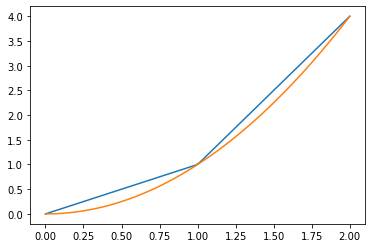

In [5]:
plt.plot(x,y)
plt.plot(x, x**2)

In [32]:
def foo(a):
    x0 = cvx.Variable()
    y0 = cvx.Variable()
    x1 = cvx.Variable()
    y1 = cvx.Variable()
    x2 = cvx.Variable()
    y2 = cvx.Variable()

    cst = [
        0 <= x0,
        x0 <= 1,
        y0 >= x0,

        x0 >= cvx.abs(x1 - 1),
        y0 <= y1 - 2*x1 + 1,
        
        x1 >= cvx.abs(x2 - 2),
        y1 <= y2 - 2*x2*2 + 4,

        x2 >= a,
    ]

    obj = cvx.Minimize(y2)

    prob = cvx.Problem(obj, cst)
    return prob.solve()

In [33]:
x = np.linspace(0,4,100)
y = [foo(a)for a in x]

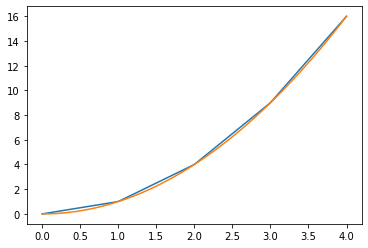

In [34]:
plt.plot(x,y)
plt.plot(x, x**2)

In [ ]:
    cst = [
        0 <= x0,
        x0 <= 1,
        y0 >= x0,

        x0 >= cvx.abs(x1 - 1),
        y0 <= y1 - 2*x1 + 1,

        x1 >= a,
    ]

    obj = cvx.Minimize(y1)

In [8]:
def foo(a, eps, N):
    # max will be eps*(2**N)
    
    x = cvx.Variable(N+1)
    y = cvx.Variable(N+1)

    cst = [
        0 <= x[0],
        x[0] <= eps,
        y[0] >= x[0]*eps,
    ]
    
    for i in range(N):
        delta = eps*(2**i)
        
        cst += [
            x[i] >= cvx.abs(x[i+1] - delta),
            y[i] <= y[i+1] - 2*delta*x[i+1] + delta**2,
        ]
        
    cst += [x[N] >= a]

    obj = cvx.Minimize(y[N])

    prob = cvx.Problem(obj, cst)

    return prob, x, y

In [13]:
prob, x, y = foo(.1, 1, 10)

In [17]:
prob.solve()

0.10000000004557812

In [19]:
x[-1]

Expression(AFFINE, UNKNOWN, ())

In [101]:
eps = .1
N = 3

x = np.linspace(0, eps*(2**N), 100)
y = [foo(a, eps, N).solve() for a in x]

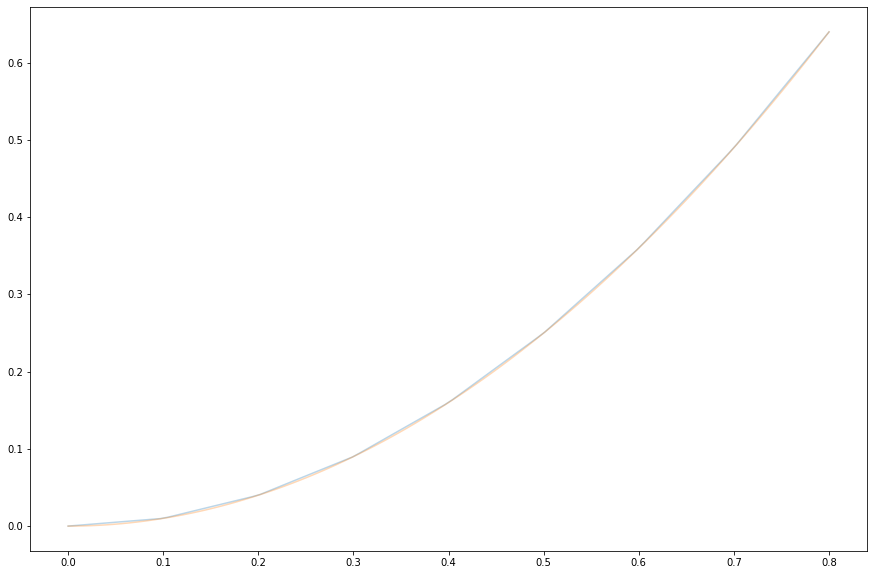

In [102]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x,y, alpha=.3)
ax.plot(x, x**2, alpha=.3)
fig.savefig('test.png', dpi=300)